<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Midterm-Exam---February-26,-2024" data-toc-modified-id="Midterm-Exam---February-26,-2024-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Midterm Exam - February 26, 2024</a></span><ul class="toc-item"><li><span><a href="#Data-Plotting-and-Fitting,-Parameter-Estimation" data-toc-modified-id="Data-Plotting-and-Fitting,-Parameter-Estimation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Plotting and Fitting, Parameter Estimation</a></span></li><li><span><a href="#Dataset-management" data-toc-modified-id="Dataset-management-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Dataset management</a></span></li></ul></li></ul></div>

# Midterm Exam - February 26, 2024

You are allowed to use general web resources for information. 

You may not talk to other humans about this exam, except for TAs and Professor Widder. Note that at the end you must list all references.

Solutions should use efficient methods except where otherwise stated. Less efficient methods will receive partial credit.

Use comments to explain your code. 

## Data Plotting and Fitting, Parameter Estimation

A useful conceptual framework for describing biochemical reactions in a metabolic system is the Michaelis-Menten function. In this framework, the biologists Henri, Michaelis, and Menten (~1913) proposed that a substrate S and a catalzying enzyme E reversibly form an intermediary complex ES, which then breaks apart and irreversibly yields the product of the reaction, P.  The enzyme is released unchanged and is ready to bind again to a substrate particle.  This is shown below with typical rate constants for all steps.
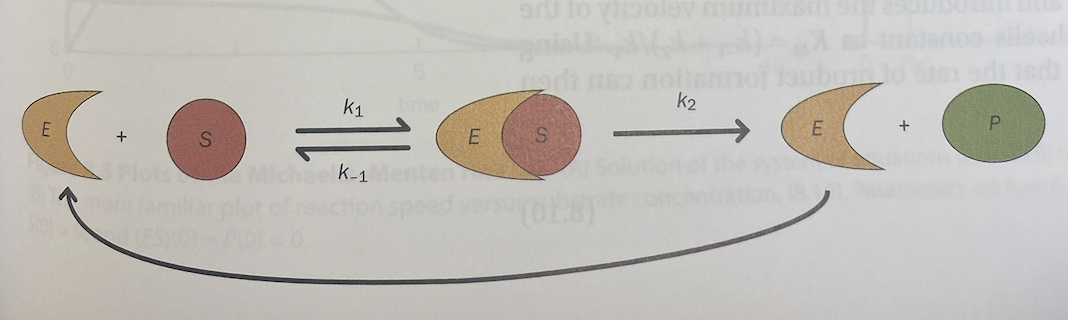

Suppose we have a very short metabolic pathway that has just two reactions: 
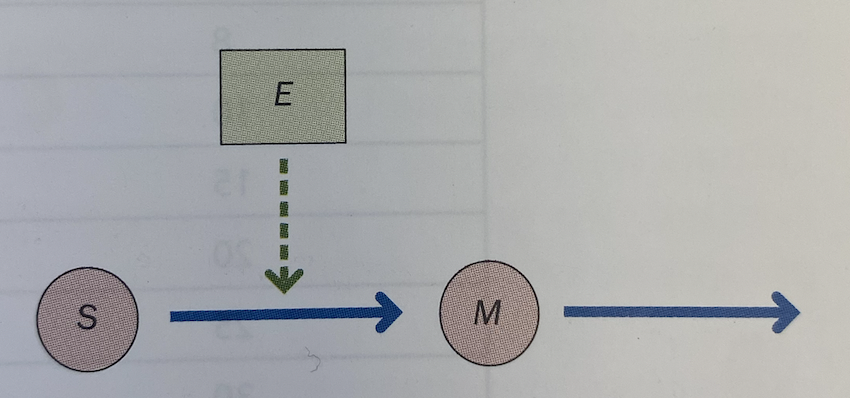
This reaction converts a substrate S into a metabolite M, catalyzed by enzyme E.  The enzyme E does not change its activity throughout this experiment. The metabolite M is subsequently used up or degraded.

The mathematical representation of the first process is described by a Michaelis-Menten function.  It is characterized by the substrate concentration *S*, the maximum possible velocity of the reaction $V_{max}$, and the Michaelis constant $K_M$, which relates to the *affinity* between the enzyme and its substrate.  This relationship is $\dot{M}\ =\ \frac{V_{max}S}{K_M+S}$.

The degradation of the metabolite is a first-order process with rate constant *c*, which tells us that the velocity of degradation is proportional to the current concentration of the metabolite *M*.  Therefore we can say that the overall change in metabolite concentration, $\dot{M}$, is the difference between production and degradation.  The complete Michaelis-Menten function therefore is:

$\dot{M}\ =\ \frac{V_{max}S}{K_M+S}-cM$

We want to estimate the three parameters $V_{max}$, $K_M$, and *c*.  Suppose someone measured the production (only, not degradation) of metabolite at varying concentrations of *S*.  This gives us $\dot{M}\ =\ \frac{V_{max}S}{K_M+S}$ for *S*, as given in the file M_production.

1\. Load the file M_production and plot M_dot as a function of S as a scatter plot. Label the axes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Relationship Between Substrate Concentration and Metabolite Concentration')

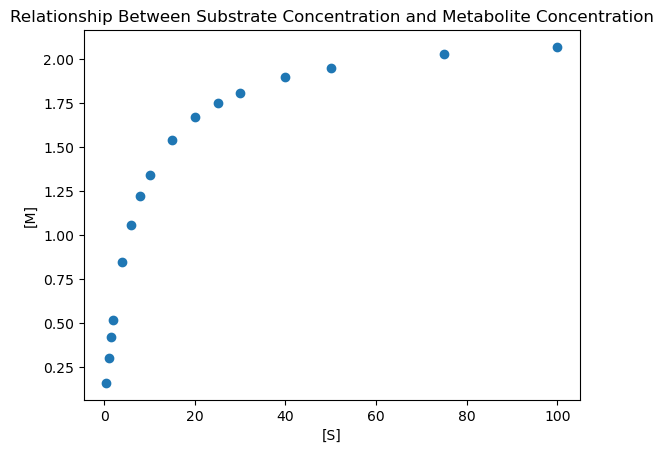

In [2]:
# loading file and axtracting variables
M_prod = pd.read_csv('M_production.csv')
S = M_prod['S']
M_dot = M_prod['M_dot']

# plotting varibles in a scatter plot
plt.scatter(S, M_dot)
plt.xlabel('[S]')
plt.ylabel('[M]')
plt.title('Relationship Between Substrate Concentration and Metabolite Concentration')

2\. This function is clearly nonlinear. Let's try to determine the parameters $V_{max}$ and $K_M$.  An old trick of Michaelis-Menten functions is that the function becomes linear if we plot 1/M_dot vs 1/S. Show that this is true with a new figure.

Text(0.5, 1.0, 'Relationship Between Inverse Substrate Concentration and Inverse Metabolite Concentration')

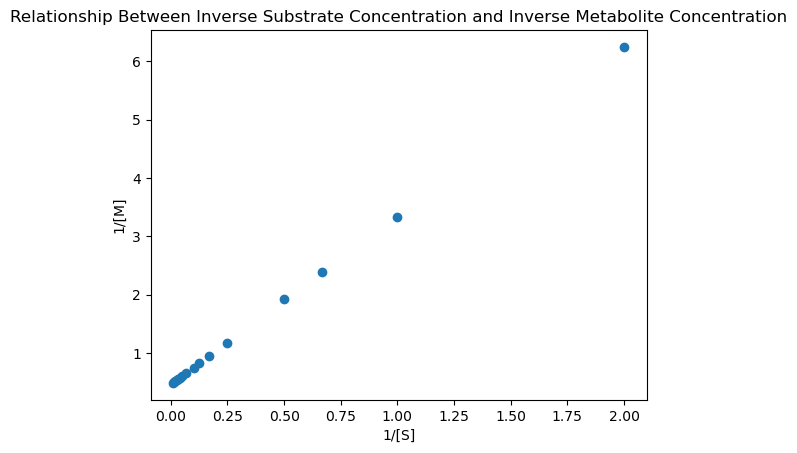

In [3]:
# defining new variables in lineweaver-burk plot
inverse_S = 1/S
inverse_M_dot = 1/M_dot
plt.scatter(inverse_S, inverse_M_dot)
plt.xlabel('1/[S]')
plt.ylabel('1/[M]')
plt.title('Relationship Between Inverse Substrate Concentration and Inverse Metabolite Concentration')

3\. Using the slope and y-intercept of the inverted Michaelis-Menten function, determine good values for $K_M$ and $V_{max}$.

2.193471645808304
2.894546867802007


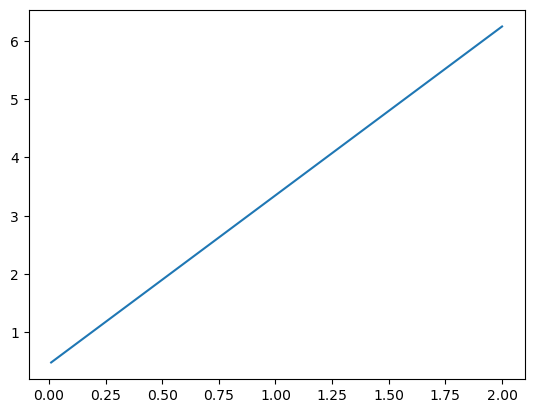

In [4]:
m, b = np.polyfit(inverse_S, inverse_M_dot,1) # obtained np.polyfit syntax from: https://www.statology.org/scatterplot-with-regression-line-python/
plt.plot(inverse_S, m * inverse_S + b)

Vmax = 1/b # obtained equation from BIOL2960 "Lecture 7: Enzymes"
Km = m # obtained equation from BIOL2960 "Lecture 7: Enzymes"

print(Vmax)
print(Km)

4\. Now suppose that the degradation of *M* was estimated in a separate step, as given in the file M_degradation.  Load this file and plot M as a function of time.  Use a scatter plot and label the axes.

Text(0.5, 1.0, 'Degradation of Metabolite Concentration Over Time')

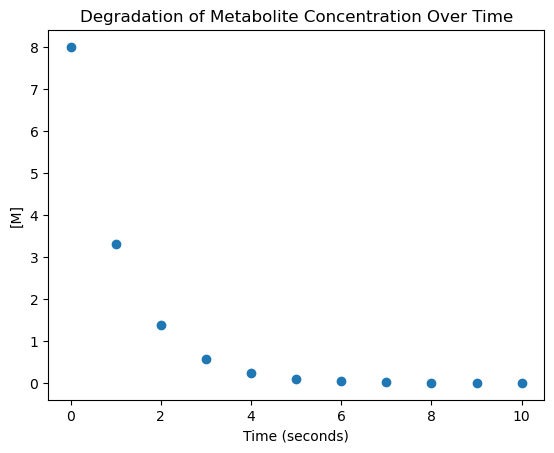

In [6]:
M_degradation = pd.read_csv('M_degradation.csv')
t_deg = M_degradation['t (sec)']
M_deg = M_degradation['M']

plt.scatter(t_deg, M_deg)
plt.xlabel('Time (seconds)')
plt.ylabel('[M]')
plt.title('Degradation of Metabolite Concentration Over Time')

5\. This degradation looks like a first order exponential decay. Plot ln(M) as a function of time to check.

Text(0.5, 1.0, 'Degradation of Metabolite Concentration Over Time')

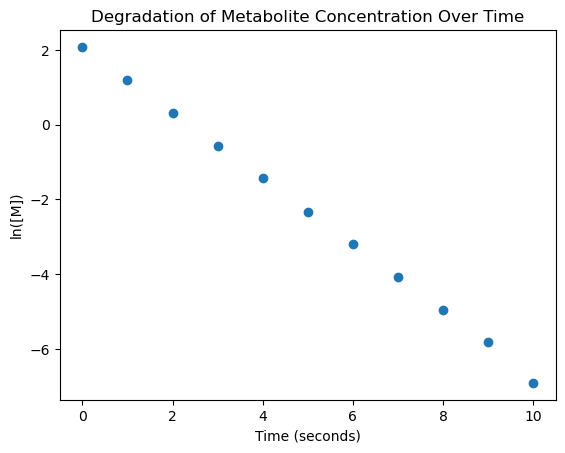

In [7]:
ln_M_deg = np.log(M_deg) # np.log obtained from: https://stackoverflow.com/questions/10593100/how-do-you-do-natural-logs-e-g-ln-with-numpy-in-python
plt.scatter(t_deg, ln_M_deg)
plt.xlabel('Time (seconds)')
plt.ylabel('ln([M])')
plt.title('Degradation of Metabolite Concentration Over Time')
# as defined on LibreTexts Chemistry,"A first-order reaction is a reaction that proceeds at a rate that depends linearly on only one reactant concentration". Therefore, the graph checks out! :)

6\. Determine a linear fit of the resulting line, and find the value of *c* that best fits the degradation portion of the function.

8.183865490157611
2.193471645808304
2.894546867802007


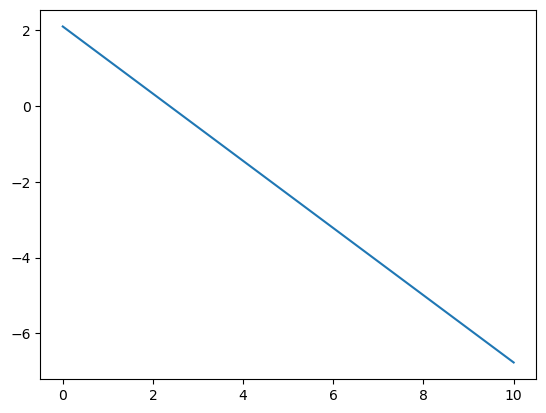

In [8]:
m6, b6 = np.polyfit(t_deg, ln_M_deg, 1) 
plt.plot(t_deg, m6 * t_deg + b6)
c = np.exp(b6) # obtained syntax for exponentiation of log functions from: https://numpy.org/doc/stable/reference/generated/numpy.exp.html
print(c)
print(Vmax) # used in next step
print(Km)# used in next step

7\. Use your parameters from problem 3 and problem 6 to plot M over time.  Use the initial conditions of S=1.2 and M0 = 2, as given. Put your VMax, KM, and c values in the integration function below, then plot y as a function of time t.

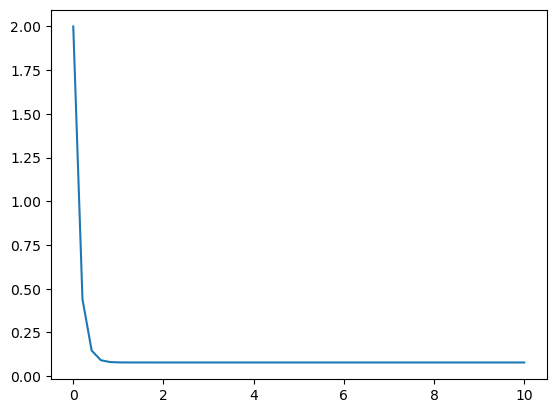

In [13]:
# this code integrates the M-M function to solve for M vs time

from scipy.integrate import odeint

def model(M,t):
    Vmax =    2.193471645808304
    KM =    2.894546867802007
    c =    8.183865490157611
    S = 1.2
    dMdt = Vmax*S/(KM + S) - c*M
    return dMdt
# initial condition
M0 = 2

# time points
t = np.linspace(0,10)

# solve ODE
y = odeint(model,M0,t)

#plotting y as a function of t
plt.plot(t,y)

8\. Finally, add the measured data M_measured.csv to the plot of your your fitted model.  Evaluate how well your chosen parameters fit the empirical data.

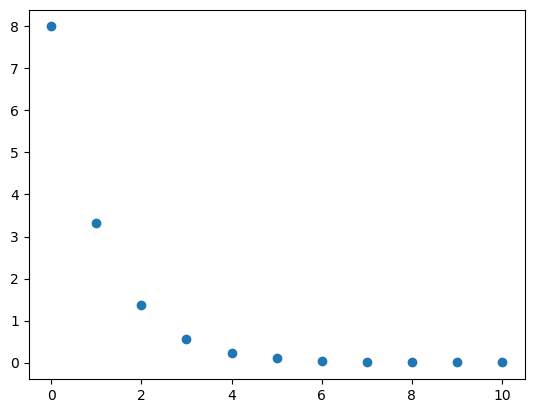

In [17]:
M_measured = pd.read_csv('M_degradation.csv')
t_meas = M_measured['t (sec)']
M_meas = M_measured['M']
plt.scatter(t_meas, M_meas)

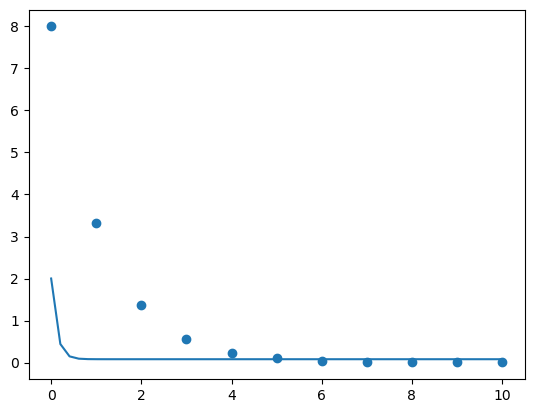

In [284]:
plt.scatter(t_meas, M_meas)
plt.plot(t,y)
plt.show() # my chosen parameters do not seem to fit the data particularly well. I am uncertain of why this is the case as the methodologies for obtaining eqution values seem solid. 

## Dataset management

9\. Download and import the Fetal_Ultrasound_Providers.csv (as fus) and Pregnancy_Assistance_Providers.csv (as pap) datasets. For the remainder of this exam, we will be using and manipulating each of these DataFrames. (source: https://data.mo.gov)

In the fus dataset, drop all columns except Facility Name, Physical Address, City, State, Zip, Facility Telephone, and Services Counties. Clean up all of the remaining columns to standardize the data. Rename 'Services Counties' to 'Counties Served'. Drop any rows that are clearly incorrect.

In the pap dataset, drop all columns except Facility Name, Physical Address, City, State, Zip, Facility Telephone, and Counties Served. Clean up all of the remaining columns to standardize the data. Drop any rows that are clearly incorrect.

In [274]:
import pandas as pd
fus = pd.read_csv('Fetal_Ultrasound_Providers_20240226.csv')
pap = pd.read_csv('Pregnancy_Assistance_Providers_20240226.csv')
fus = fus[['Facility Name', 'Physical Address', 'City', 'State', 'Zip', 'Facility Telephone', 'Services counties']]
fus.columns = ['Facility Name', 'Physical Address', 'City', 'State', 'Zip', 'Facility Telephone', 'Counties Served'] # .columns syntax obtained from: https://blog.finxter.com/5-best-ways-to-rename-column-names-in-python-pandas/
#standardiizing each columns' case-ing
fus['Facility Name'] = fus['Facility Name'].str.title()

fus['Physical Address'] = fus['Physical Address'].str.title() # obtained str.title method from: https://www.geeksforgeeks.org/title-in-python/

fus['City'] = fus['City'].str.title()

# standardizing state abbreviations
fus['State'] = 'MO'

# standardizing formatting of phone numbers
def phone_number_formatting(number):
    number = ''.join(filter(str.isdigit, str(number))) 
    # join() syntax obtained from: https://www.w3schools.com/python/ref_string_join.asp
    # filter() syntax obtained from: https://www.geeksforgeeks.org/filter-in-python/
    if len(number) == 10:
        return '({}) {}-{}'.format(number[:3], number[3:6], number[6:]) # format() syntax obtained from: https://www.w3schools.com/python/ref_string_format.asp
    else:
        return np.nan
fus['Facility Telephone'] = fus['Facility Telephone'].apply(phone_number_formatting)

# standardizing zip code formating
def zip_code_formatting(number):
    number = ''.join(filter(str.isdigit, str(number)))  
    if len(number) == 5:
        return number
    elif len(number) == 9:
        return number[:5] + '-' + number[5:]
    else:
        return np.nan 
fus['Zip'] = fus['Zip'].apply(zip_code_formatting)

# dropping clearly incorrect rows
fus = fus.drop([6,7])
fus.head()

,Facility Name,Physical Address,City,State,Zip,Facility Telephone,Counties Served
0,Shelby County Health Dept.,700 E. Main St,Shelbyville,MO,63469,(573) 633-2353,Shelby
1,Health Department,500 Olin Street,Pineville,MO,64856,(417) 223-4351,McDonald
2,Regional Family Crisis Center,307 Independence Drive,Perryville,MO,63775,(573) 547-2480,"Bollinger,Cape Girardeau,Madison,Perry,St. Fra..."
3,City Of St. Joseph Health Department,904 S. 10Th Street,St. Joseph,MO,64503,(816) 271-4636,Buchanan
4,Atchison County Health Department,421 Main,Tarkio,MO,64491,(660) 736-4121,"All Counties,Atchison"


In [276]:
pap = pap[['Facility Name', 'Physical Address', 'City', 'State', 'Zip', 'Facility Telephone', 'Counties Served']]
# standardizing case-s in each column
pap['Physical Address'] = pap['Physical Address'].str.title()

pap['City'] = pap['City'].str.title()

# standardizing state abbreviations
pap['State'] = 'MO'

# standardizing formatting of phone numbers
pap['Facility Telephone'] = pap['Facility Telephone'].apply(phone_number_formatting)

# standardizing zip code formating
pap['Zip'] = pap['Zip'].apply(zip_code_formatting)

# dealnig with clearly wrong data
pap = pap.drop([37], axis = 0)
pap.head()

,Facility Name,Physical Address,City,State,Zip,Facility Telephone,Counties Served
0,Dent County Health Center,1010 E. Scenic Rivers Blvd,Salem,MO,65560,(573) 729-3106,Dent
1,Ste Genevieve Co Health Department,115 Basler Drive,Ste Genevieve,MO,63670,(573) 883-7411,All Counties
2,St. Francois County Health Center,1025 W. Main St.,Park Hills,MO,63601-2079,(573) 431-1947,"All Counties,Iron,Madison,Perry,St. Francois,S..."
3,Cass County Health Department,1411 S. Commercial Street,Harrisonville,MO,64701,(816) 380-8425,All Counties
4,Gasconade County Health Department,300 Schiller St,Hermann,MO,65041,(573) 486-3129,"Callaway,Gasconade,Maries,Montgomery,Osage,Phe..."


10\. In both datasets, notice that the 'Counties Served' column contains strings of county names separated by commas. Break the strings into lists of counties using split.

In [277]:
counties_list_fus = fus['Counties Served'].apply(str.split, args=(',', )) # split syntax found on: https://www.w3schools.com/python/ref_string_split.asp
fus['Counties Served'] = counties_list_fus
counties_list_pap = pap['Counties Served'].apply(str.split, args=(',', ))
pap['Counties Served'] = counties_list_pap
fus.head()
pap.head()

,Facility Name,Physical Address,City,State,Zip,Facility Telephone,Counties Served
0,Dent County Health Center,1010 E. Scenic Rivers Blvd,Salem,MO,65560,(573) 729-3106,[Dent]
1,Ste Genevieve Co Health Department,115 Basler Drive,Ste Genevieve,MO,63670,(573) 883-7411,[All Counties]
2,St. Francois County Health Center,1025 W. Main St.,Park Hills,MO,63601-2079,(573) 431-1947,"[All Counties, Iron, Madison, Perry, St. Franc..."
3,Cass County Health Department,1411 S. Commercial Street,Harrisonville,MO,64701,(816) 380-8425,[All Counties]
4,Gasconade County Health Department,300 Schiller St,Hermann,MO,65041,(573) 486-3129,"[Callaway, Gasconade, Maries, Montgomery, Osag..."


11\.  Now find a way to explode the list of counties so that each county has its own row, with all other data remaining the same.

In [280]:
fus_expl = fus.explode('Counties Served').reset_index(drop = True) # explode syntax found on:https://www.w3schools.com/python/pandas/ref_df_explode.asp
fus_expl
pap_expl = pap.explode('Counties Served').reset_index(drop = True)
pap_expl

,Facility Name,Physical Address,City,State,Zip,Facility Telephone,Counties Served
0,Dent County Health Center,1010 E. Scenic Rivers Blvd,Salem,MO,65560,(573) 729-3106,Dent
1,Ste Genevieve Co Health Department,115 Basler Drive,Ste Genevieve,MO,63670,(573) 883-7411,All Counties
2,St. Francois County Health Center,1025 W. Main St.,Park Hills,MO,63601-2079,(573) 431-1947,All Counties
3,St. Francois County Health Center,1025 W. Main St.,Park Hills,MO,63601-2079,(573) 431-1947,Iron
4,St. Francois County Health Center,1025 W. Main St.,Park Hills,MO,63601-2079,(573) 431-1947,Madison
...,...,...,...,...,...,...,...
118,University Health Truman Medical Center,2301 Holmes Street,Kansas City,MO,64108,(816) 404-1000,Platte
119,University Health Lakewood Medical Center,7900 Lee'S Summit Road,Kansas City,MO,64139,(816) 404-7000,Cass
120,University Health Lakewood Medical Center,7900 Lee'S Summit Road,Kansas City,MO,64139,(816) 404-7000,Clay
121,University Health Lakewood Medical Center,7900 Lee'S Summit Road,Kansas City,MO,64139,(816) 404-7000,Jackson


12\. Set each of the dataset primary indexes to 'Counties Served', and secondary index to 'Zip'. Sort each dataset by these indexes.

In [282]:
new_fus = fus_expl.set_index(['Counties Served', 'Zip']) # set index syntax obtained from: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html
new_fus.sort_index()

Facility Name  \
Counties Served Zip                                                   
Adair           63501                Adair County Health Department   
All Counties    63134       St. Louis County Dept. Of Public Health   
                63664-1598      Washington County Health Department   
                64491             Atchison County Health Department   
                65020               Camden County Health Department   
...                                                             ...   
Washington      63664           Washington County Health Department   
Wayne           63944                    Wayne County Health Center   
Webster         65536              Laclede County Health Department   
Worth           64489-0011              Tricounty Health Department   
Wright          65536              Laclede County Health Department   

                                    Physical Address        City State  \
Counties Served Zip                                                      
Adair           63501         1001 S. Jamison Street  Kirksville    MO   
All Counties    63134         6121 North Hanley Road    Berkeley    MO   
                63664-1598            520 Purcell Rd      Potosi    MO   
                64491                       421 Main      Tarkio    MO   
                65020           1976 N Business Rt 5   Camdenton    MO   
...                                              ...         ...   ...   
Washington      63664              520 Purcell Drive      Potosi    MO   
Wayne           63944       115 Hickory Street P 259  Greenville    MO   
Webster         65536             405 Harwood Avenue     Lebanon    MO   
Worth           64489-0011                302 N Park   Stanberry    MO   
Wright          65536             405 Harwood Avenue     Lebanon    MO   

                           Facility Telephone  
Counties Served Zip                            
Adair           63501          (660) 665-8491  
All Counties    63134          (314) 615-0500  
                63664-1598     (573) 438-2164  
                64491          (660) 736-4121  
                65020          (573) 346-5479  
...                                       ...  
Washington      63664          (573) 438-2164  
Wayne           63944          (573) 224-3218  
Webster         65536          (417) 532-2134  
Worth           64489-0011     (660) 783-2707  
Wright          65536          (417) 532-2134  

[120 rows x 5 columns]

13\. Combine the two datasets on the primary row index by passing fus into pap. What is the shape of this combined dataset?

In [283]:
new_pap = pap_expl.set_index(['Counties Served', 'Zip'])
new_pap.sort_index()

Facility Name  \
Counties Served Zip                                                     
Adair           63501                  Adair County Health Departmemt   
                65109       Pregnancy Help Center of Central Missouri   
All Counties    63601-2079          St. Francois County Health Center   
                63670              Ste Genevieve Co Health Department   
                64491               Atchison County Health Department   
...                                                               ...   
Washington      63601-2079          St. Francois County Health Center   
                63664             Washington County Health Department   
                63775                               Options for Women   
Webster         65706                      Webster County Health Unit   
Worth           64489                     TRICOUNTY HEALTH DEPARTMENT   

                                                          Physical Address  \
Counties Served Zip                                                          
Adair           63501                               1001 S. Jamison Street   
                65109                                  1433 Southwest Blvd   
All Counties    63601-2079                                1025 W. Main St.   
                63670                                     115 Basler Drive   
                64491                                      421 Main Street   
...                                                                    ...   
Washington      63601-2079                                1025 W. Main St.   
                63664                   520 Purcell Drive, Potosi Mo 63664   
                63775                               1019 N Kingshighway St   
Webster         65706       233 E. Washington Street, Deliver To East Door   
Worth           64489                                           302 N Park   

                                      City State Facility Telephone  
Counties Served Zip                                                  
Adair           63501           Kirksville    MO     (660) 665-8491  
                65109       Jefferson City    MO     (573) 644-6635  
All Counties    63601-2079      Park Hills    MO     (573) 431-1947  
                63670        Ste Genevieve    MO     (573) 883-7411  
                64491               Tarkio    MO     (660) 736-4121  
...                                    ...   ...                ...  
Washington      63601-2079      Park Hills    MO     (573) 431-1947  
                63664               Potosi    MO     (573) 438-2164  
                63775           Perryville    MO     (573) 547-3800  
Webster         65706           Marshfield    MO     (417) 859-2532  
Worth           64489            Stanberry    MO     (660) 783-2707  

[123 rows x 5 columns]

In [285]:
# dont know where the question went lol, but here it is copied: 
# 13. Combine the two datasets on the primary row index by passing fus into pap. What is the shape of this combined dataset?

In [291]:
net_dataframe = pd.merge(new_pap, new_fus, left_index = True, right_index = True)
print(net_dataframe.shape)
net_dataframe

(61, 10)


Facility Name_x  \
Counties Served Zip                                           
Adair           63501        Adair County Health Departmemt   
All Counties    64491     Atchison County Health Department   
Atchison        64491     Atchison County Health Department   
Bollinger       63703  Options for Women, Help for Families   
                63775                     Options for Women   
...                                                     ...   
Ste. Genevieve  63775                     Options for Women   
                63775                     Options for Women   
Texas           65483        Texas County Health Department   
                65483        Texas County Health Department   
Washington      63664   Washington County Health Department   

                                       Physical Address_x          City_x  \
Counties Served Zip                                                         
Adair           63501              1001 S. Jamison Street      Kirksville   
All Counties    64491                     421 Main Street          Tarkio   
Atchison        64491                     421 Main Street          Tarkio   
Bollinger       63703          354 S. Silver Springs Road  Cape Girardeau   
                63775              1019 N Kingshighway St      Perryville   
...                                                   ...             ...   
Ste. Genevieve  63775              1019 N Kingshighway St      Perryville   
                63775              1019 N Kingshighway St      Perryville   
Texas           65483              950 N Hwy 63 Suite 500         Houston   
                65483              950 N Hwy 63 Suite 500         Houston   
Washington      63664  520 Purcell Drive, Potosi Mo 63664          Potosi   

                      State_x Facility Telephone_x  \
Counties Served Zip                                  
Adair           63501      MO       (660) 665-8491   
All Counties    64491      MO       (660) 736-4121   
Atchison        64491      MO       (660) 736-4121   
Bollinger       63703      MO       (573) 339-2032   
                63775      MO       (573) 547-3800   
...                       ...                  ...   
Ste. Genevieve  63775      MO       (573) 547-3800   
                63775      MO       (573) 547-3800   
Texas           65483      MO       (417) 967-4131   
                65483      MO       (417) 967-4131   
Washington      63664      MO       (573) 438-2164   

                                            Facility Name_y  \
Counties Served Zip                                           
Adair           63501        Adair County Health Department   
All Counties    64491     Atchison County Health Department   
Atchison        64491     Atchison County Health Department   
Bollinger       63703  Options For Women, Help For Families   
                63775         Regional Family Crisis Center   
...                                                     ...   
Ste. Genevieve  63775         Regional Family Crisis Center   
                63775                     Options For Women   
Texas           65483        Texas County Health Department   
                65483             Texas County Health Dept.   
Washington      63664   Washington County Health Department   

                                        Physical Address_y          City_y  \
Counties Served Zip                                                          
Adair           63501               1001 S. Jamison Street      Kirksville   
All Counties    64491                             421 Main          Tarkio   
Atchison        64491                             421 Main          Tarkio   
Bollinger       63703  354 S. Silver Springs Road, Suite E  Cape Girardeau   
                63775               307 Independence Drive      Perryville   
...                                                    ...             ...   
Ste. Genevieve  63775               307 Independence Drive      Perryville 

Please list all of your sources here:

# all sources were citeded and indicated where referenced :)